# Lead Scoring Case study

### 1. Import all libraries, read and clean the input data, and carrying out EDA

In [1]:
#importing all libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [2]:
#changing pandas setting to increase display max_rows and max_columns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
#reading the file csv file
leads_df = pd.read_csv("Leads.csv")

In [4]:
#dispalying the columns of the dataframe
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#checking the shape of the dataframe
leads_df.shape

(9240, 37)

In [6]:
#Dropping the Prospect ID, Lead Number as the column is not needed for building the model and has no impact on the target
leads_df.drop(columns=['Prospect ID',"Lead Number"], axis=1, inplace=True)

In [7]:
#creating a LeadID series column to identify the lead and their score
leads_df['LeadID']=leads_df.index

In [8]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,LeadID
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,1
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,2
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,3
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,4


In [9]:
#checking percentages of null value
leads_df.isnull().sum() * 100/len(leads_df)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

#### Dropping columns "Lead Quality", Asymmetrique indices and scores as these columns have close 50% nulls

In [10]:
leads_df.drop(columns=['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index'
                       ,'Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [11]:
#checking percentages of null value
leads_df.isnull().sum() * 100/len(leads_df)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [12]:
# Replace all Select values in the categorical variables with NaN
leads_df.replace({'Select': np.NaN},inplace =True)

In [13]:
#checking percentages of null value after replacement of 'Select' with Null
leads_df.isnull().sum() * 100/len(leads_df)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [14]:
# drop columns that are majority nulls
leads_df.drop(columns=['How did you hear about X Education','Lead Profile','Country',
                      'Specialization','What is your current occupation',
                       'What matters most to you in choosing a course','Tags','City'],axis=1, inplace=True)

In [15]:
#checking percentages of null value
leads_df.isnull().sum() * 100/len(leads_df)

Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.000000
Update me on Supply Chain Content           0.000000
Get updates on DM Content                   0.

In [16]:
#checking percentages of null value in every column where TotalVisits is null
leads_df[leads_df.TotalVisits.isna()].isnull().sum()*100/len(leads_df[leads_df.TotalVisits.isna()])

Lead Origin                                   0.000000
Lead Source                                   5.109489
Do Not Email                                  0.000000
Do Not Call                                   0.000000
Converted                                     0.000000
TotalVisits                                 100.000000
Total Time Spent on Website                   0.000000
Page Views Per Visit                        100.000000
Last Activity                                75.182482
Search                                        0.000000
Magazine                                      0.000000
Newspaper Article                             0.000000
X Education Forums                            0.000000
Newspaper                                     0.000000
Digital Advertisement                         0.000000
Through Recommendations                       0.000000
Receive More Updates About Our Courses        0.000000
Update me on Supply Chain Content             0.000000
Get update

In [17]:
#since we could see where TotalVisits is null, 'Page Views Per Visit' and 'Last ACtivity' are mostly null
#dropping rows where TotalVisits is null
leads_df=leads_df[leads_df.TotalVisits.notna()]

In [18]:
#checking datafarme shape after cleaning
leads_df.shape

(9103, 23)

In [19]:
#dropping rows where 'Lead Source' is null
leads_df=leads_df[leads_df["Lead Source"].notna()]

In [20]:
#checking percentages of null value
leads_df.isnull().sum() * 100/len(leads_df)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview  

In [21]:
# List of variables to map Yes/No to binary 1/0 respectively

varlist =  ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
           'Update me on Supply Chain Content','Get updates on DM Content',
           'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_df[varlist] = leads_df[varlist].apply(binary_map)

In [22]:
leads_df.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,LeadID
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.0,9074.000000,9074.000000
mean,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.0,0.318272,4636.714459
std,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.0,0.465831,2662.208162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,2336.250000
50%,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,4637.500000
75%,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6944.750000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,9239.000000


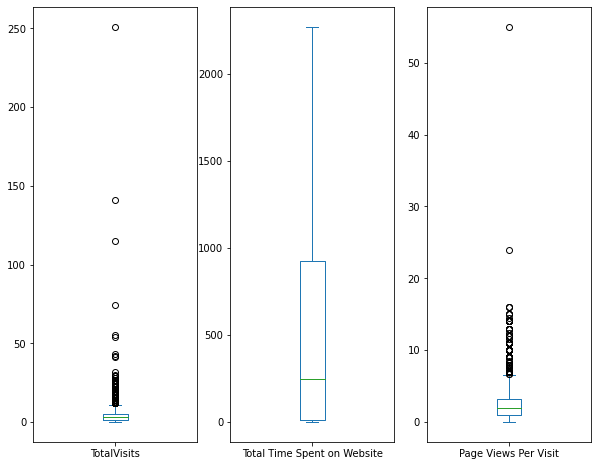

In [23]:
#check for outliers in numeric columns
num_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize = (10,8))   
for i in range(len(num_cols)):
    plt.subplot(1,3,i+1)
    leads_df[num_cols[i]].plot(kind="box")

In [24]:
#droppin outliers from 'TotalVisits' and 'Page Views Per Visit'
leads_df=leads_df[leads_df["Page Views Per Visit"]<20]
leads_df=leads_df[leads_df["TotalVisits"]<50]

In [25]:
#re-checking the shape of the dtaframe after removing of outliers
leads_df.shape

(9067, 23)

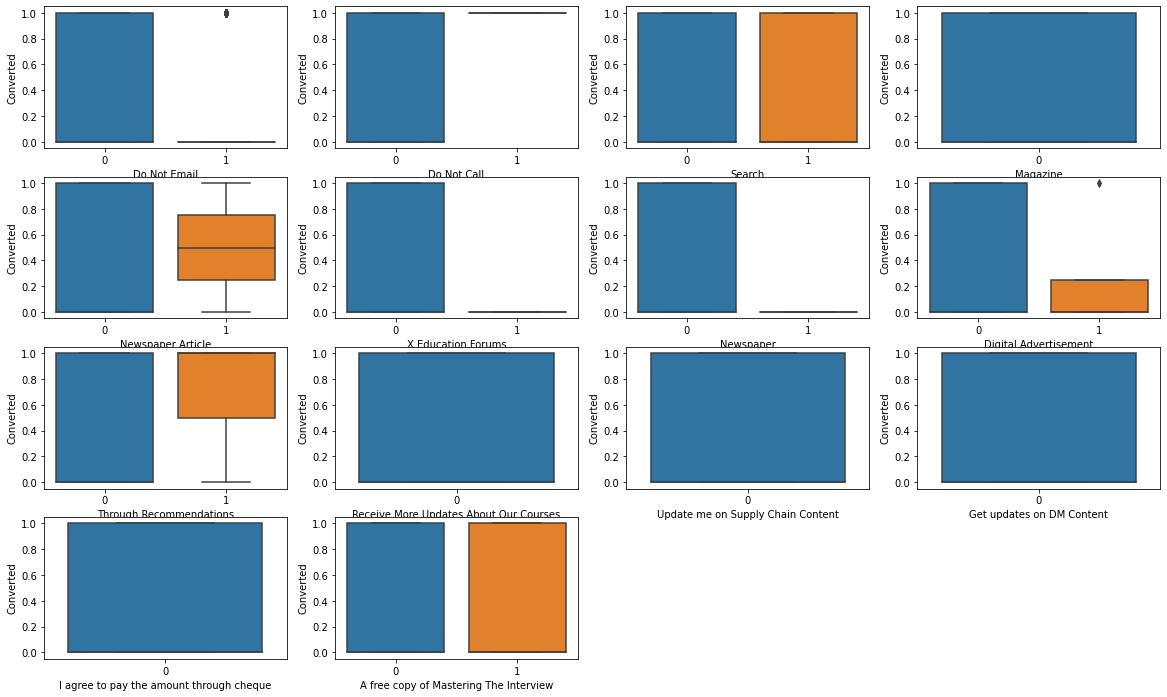

In [26]:
#study of target variable (Converted) with other Categorical Columns
plt.figure(figsize=(20, 12))
for i in range(len(varlist)):
    plt.subplot(4,4,i+1)
    sns.boxplot(x = varlist[i], y = 'Converted', data = leads_df)

In [27]:
#dropping those categorical columns which shows no variance with the Target variable
drop_cols=["Magazine","Receive More Updates About Our Courses",
          "Update me on Supply Chain Content","Get updates on DM Content",
           "I agree to pay the amount through cheque"]
leads_df.drop(columns=drop_cols,inplace=True)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [28]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads_df = pd.concat([leads_df, dummy1], axis=1)

In [29]:
#droppin the columns for which dummies have been created
leads_df.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'],inplace=True)

### 2. Train-Test Split

In [30]:
#checking for the dataframe columns before splitting into train and test
leads_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadID,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [31]:
#Putting feature variable in X
X = leads_df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadID,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [32]:
#Putting Converted variable in y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [33]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### 3. Feature Scaling

In [34]:
#imporitng StandardScaler library to scale numeric columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [35]:
#scaling the numeric columns
scale_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadID,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5962,0,0,-0.393598,0.792612,-0.649958,0,0,0,0,0,0,0,5962,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5637,0,0,-0.112202,-0.503608,0.308215,0,0,0,0,0,0,0,5637,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6716,1,0,-0.112202,-0.262065,0.308215,0,0,0,0,0,0,1,6716,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1715,0,0,0.169195,-0.680617,0.787302,0,0,0,0,0,0,0,1715,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1361,0,0,-0.393598,-0.737776,-0.170871,0,0,0,0,0,0,1,1361,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### 4. Checking Conversion Rate

In [36]:
# Checking the Conversion Rate
conversion_rate = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
conversion_rate

37.862578581669794

##### We have  a conversion rate of 38% approximately in original dataframe

### 5. Feature Selection using RFE

In [37]:
#checking the shape of train dataset
X_train.shape

(7253, 67)

In [38]:
#import LogisticRegression library from sklearn package for feature selection using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [39]:
#Carrying on feature selection using RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 35)
rfe = rfe.fit(X_train, y_train)

In [40]:
rfe.support_

array([ True, False, False,  True, False, False, False, False,  True,
       False,  True, False, False, False,  True,  True,  True, False,
        True, False, False,  True,  True, False, False,  True,  True,
        True, False,  True, False,  True,  True, False, False, False,
       False,  True, False, False,  True,  True, False,  True,  True,
       False,  True,  True, False, False, False, False,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False])

In [41]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 14),
 ('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Search', False, 22),
 ('Newspaper Article', False, 27),
 ('X Education Forums', False, 10),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 5),
 ('Through Recommendations', True, 1),
 ('A free copy of Mastering The Interview', False, 31),
 ('LeadID', False, 32),
 ('Lead Origin_Landing Page Submission', False, 29),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 33),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 28),
 ('Lead Source_NC_EDM', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 20),
 ('Lead Source_Press_Release', False, 13),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Site

In [42]:
#getting list of top 35 features returned by RFE
col = X_train.columns[rfe.support_]

### 5. Looking at correlations

In [43]:
#Filtering dataframe to have only those columns returned by RFE
X_train = X_train[col]

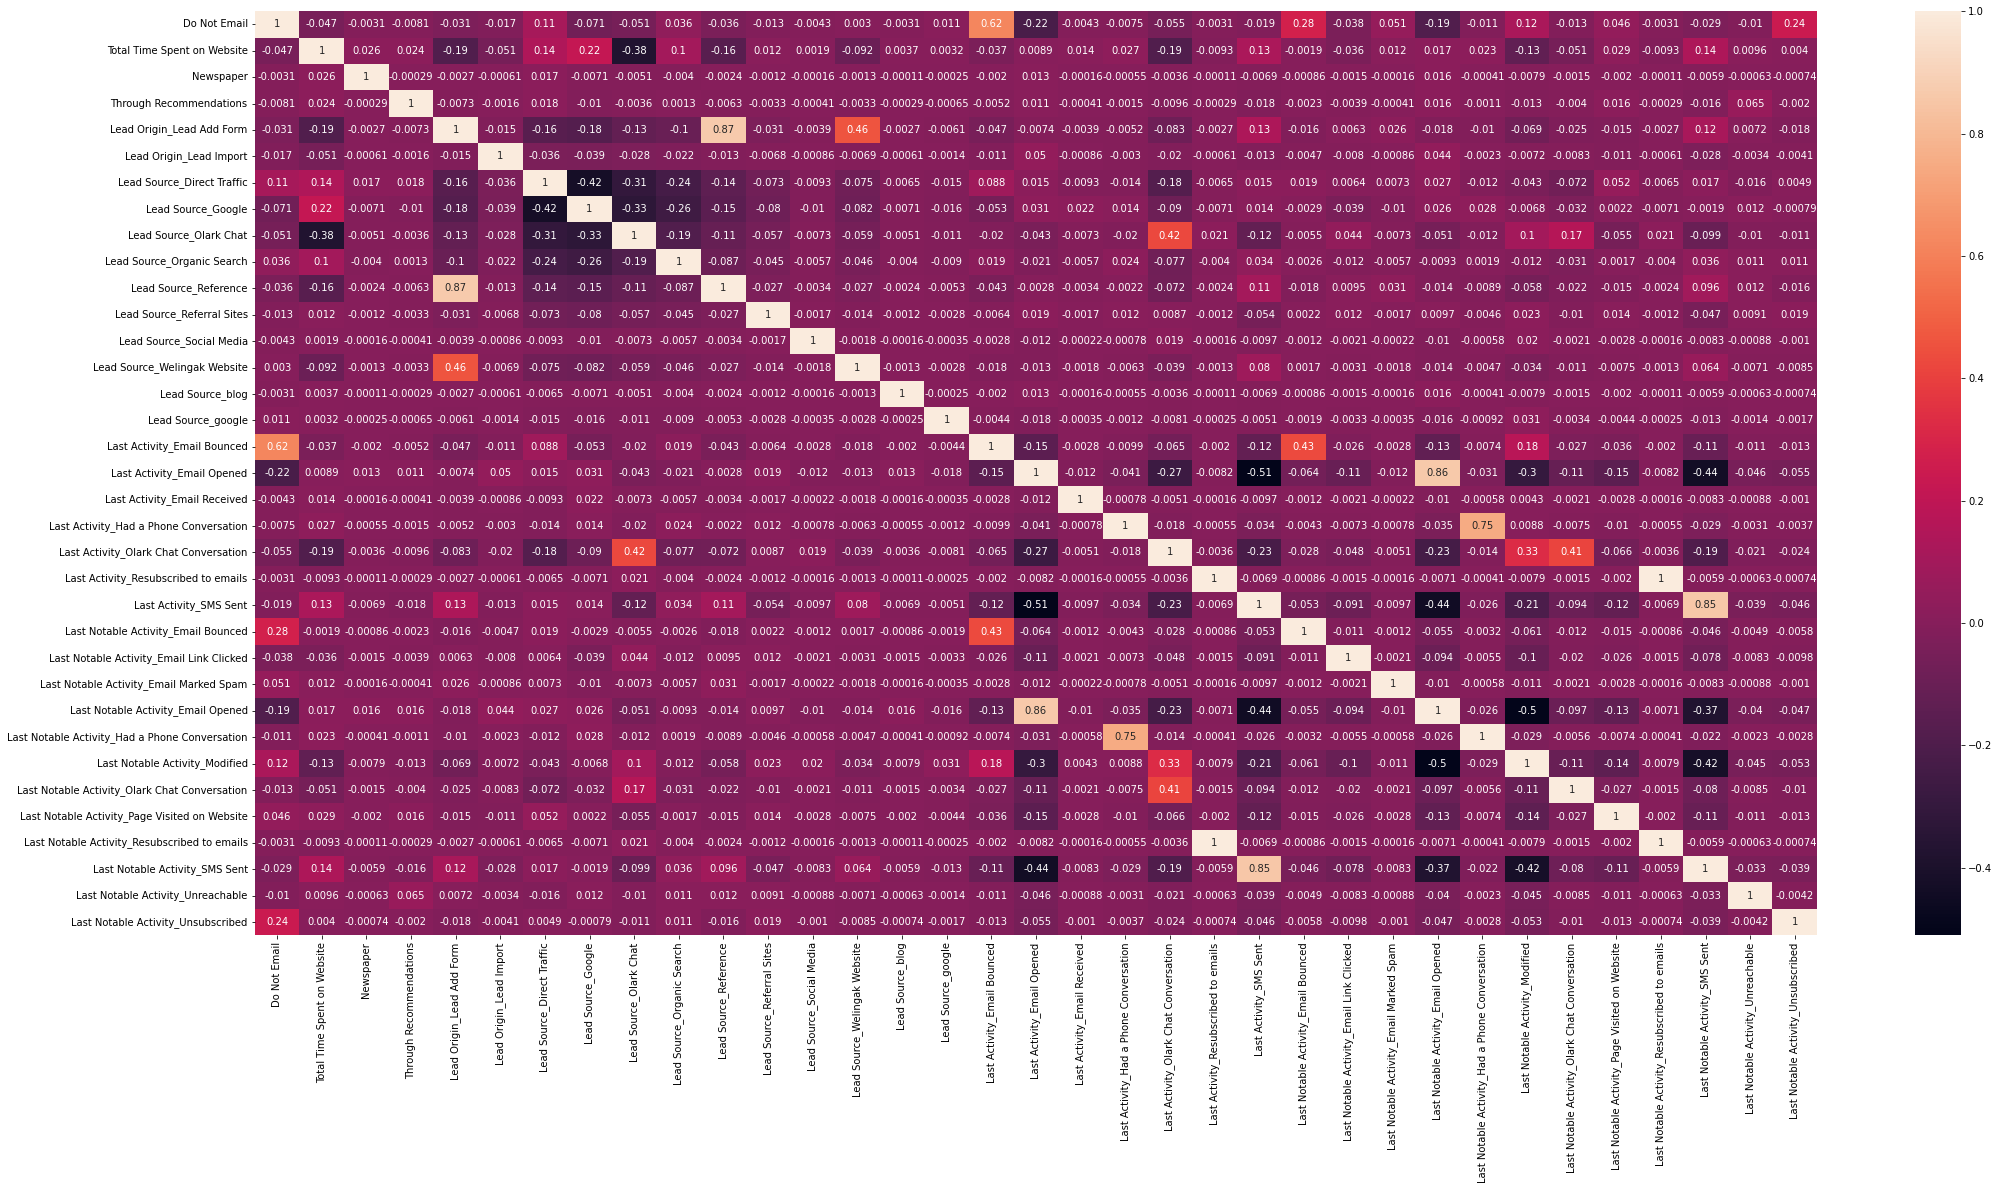

In [44]:
# Let's see the correlation matrix 
plt.figure(figsize = (35,17))        # Size of the figure
sns.heatmap(leads_df[col].corr(),annot = True)
plt.show()

In [45]:
#lets drop dummy variables highly correlated greater than 50%
high_corr_var= ["Lead Origin_Lead Add Form","Last Activity_Email Opened",
               "Last Activity_Had a Phone Conversation","Last Activity_Resubscribed to emails",
               "Last Activity_SMS Sent","Last Notable Activity_Email Opened"]

X_test = X_test.drop(high_corr_var, 1)
X_train = X_train.drop(high_corr_var, 1)

In [46]:
#checking the shape of train and test dataframe before model building
X_test.shape,X_train.shape

((1814, 61), (7253, 29))

### 6. Model Building

In [47]:
#Building Logistic Regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7253
Model:                            GLM   Df Residuals:                     7223
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3164.0
Date:                Tue, 19 Sep 2023   Deviance:                       6328.0
Time:                        16:28:16   Pearson chi2:                 7.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3652
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.6708      0.560     -1.199      0.231      -1.768       0.426
Do Not Email                                      -1.4281      0.193     -7.385      0.000      -1.807      -1.049
Total Time Spent on Website                        1.1317      0.037     30.812      0.000       1.060       1.204
Newspaper                                        -24.0341   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Through Recommendations                            1.6128      0.990      1.629      0.103      -0.327       3.553
Lead Origin_Lead Import                            1.0843      0.699      1.550      0.121      -0.287       2.455
Lead Source_Direct Traffic                        -0.6465      0.561     -1.152      0.250      -1.747       0.454
Lead Source_Google                                -0.2337      0.561     -0.417      0.677      -1.333       0.866
Lead Source_Olark Chat                             0.7365      0.564      1.306      0.192      -0.369       1.842
Lead Source_Organic Search                        -0.3894      0.565     -0.689      0.491      -1.497       0.718
Lead Source_Reference                              3.9876      0.597      6.677      0.000       2.817       5.158
Lead Source_Referral Sites                        -0.4196      0.627     -0.669      0.503      -1.649       0.809
Lead Source_Social Media                           1.6545      1.527      1.084      0.279      -1.338       4.647
Lead Source_Welingak Website                       5.4864      0.915      5.999      0.000       3.694       7.279
Lead Source_blog                                 -22.3123   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_google                               -21.7192   2.11e+04     -0.001      0.999   -4.13e+04    4.13e+04
Last Activity_Email Bounced                       -1.3081      0.545     -2.400      0.016      -2.376      -0.240
Last Activity_Email Received                      22.6179   3.37e+04      0.001      0.999    -6.6e+04    6.61e+04
Last Activity_Olark Chat Conversation             -1.3208      0.180     -7.341      0.000      -1.674      -0.968
Last Notable Activity_Email Bounced                1.4982      0.688      2.177      0.029       0.149       2.847
Last Notable Activity_Email Link Clicked          -0.6680      0.245     -2.728      0.006      -1.148      -0.188
Last Notable Activity_Email Marked Spam           22.1150   3.37e+04      0.001      0.999   -6.59e+04     6.6e+04
Last Notable Activity_Had a Phone Conversation     3.4252      1.083      3.164      0.002       1.303       5.547
Last Notable Activity_Modified                    -0.4815      0.083     -5.823      0.000   

In [48]:
# Let's check the VIFs
col=X_train.columns.to_list()
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,Last Notable Activity_Modified,2.68
15,Last Activity_Email Bounced,2.10
0,Do Not Email,2.05
17,Last Activity_Olark Chat Conversation,1.97
7,Lead Source_Olark Chat,1.85
26,Last Notable Activity_SMS Sent,1.83
6,Lead Source_Google,1.71
5,Lead Source_Direct Traffic,1.63
23,Last Notable Activity_Olark Chat Conversation,1.39
8,Lead Source_Organic Search,1.32


In [49]:
#we could see we have two dummies column for google lets combine them
X_train['Lead Source_Google']=X_train['Lead Source_Google']|X_train['Lead Source_google']
X_train.drop(columns=['Lead Source_google'],inplace=True)

#we could see we have two dummies column for google lets combine them
X_test['Lead Source_Google']=X_test['Lead Source_Google']|X_test['Lead Source_google']
X_test.drop(columns=['Lead Source_google'],inplace=True)

In [50]:
#dropping insignificant variables
cols_to_del=["Newspaper","Lead Source_Referral Sites","Lead Source_blog","Last Activity_Email Received",
            "Last Notable Activity_Email Marked Spam","Last Notable Activity_Resubscribed to emails"]
X_test = X_test.drop(cols_to_del, 1)
X_train = X_train.drop(cols_to_del, 1)

In [51]:
# Logistic regression model
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7253
Model:                            GLM   Df Residuals:                     7230
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3171.3
Date:                Tue, 19 Sep 2023   Deviance:                       6342.7
Time:                        16:28:18   Pearson chi2:                 7.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3639
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.0270      0.256     -4.013      0.000      -1.529      -0.525
Do Not Email                                      -1.3988      0.191     -7.324      0.000      -1.773      -1.024
Total Time Spent on Website                        1.1303      0.037     30.833      0.000       1.058       1.202
Through Recommendations                            1.6137      0.990      1.631      0.103      -0.326       3.553
Lead Origin_Lead Import                            1.4408      0.492      2.929      0.003       0.477       2.405
Lead Source_Direct Traffic                        -0.2896      0.260     -1.113      0.266      -0.800       0.220
Lead Source_Google                                 0.1252      0.258      0.485      0.628      -0.381       0.631
Lead Source_Olark Chat                             1.0976      0.266      4.128      0.000       0.576       1.619
Lead Source_Organic Search                        -0.0310      0.267     -0.116      0.908      -0.555       0.493
Lead Source_Reference                              4.3566      0.331     13.161      0.000       3.708       5.005
Lead Source_Social Media                           2.0170      1.443      1.398      0.162      -0.811       4.844
Lead Source_Welingak Website                       5.8396      0.768      7.604      0.000       4.334       7.345
Last Activity_Email Bounced                       -1.3292      0.544     -2.442      0.015      -2.396      -0.262
Last Activity_Olark Chat Conversation             -1.3210      0.180     -7.345      0.000      -1.674      -0.969
Last Notable Activity_Email Bounced                1.4885      0.688      2.164      0.030       0.140       2.837
Last Notable Activity_Email Link Clicked          -0.6725      0.245     -2.747      0.006      -1.152      -0.193
Last Notable Activity_Had a Phone Conversation     3.4225      1.083      3.162      0.002       1.301       5.544
Last Notable Activity_Modified                    -0.4876      0.083     -5.908      0.000      -0.649      -0.326
Last Notable Activity_Olark Chat Conversation     -0.3340      0.340     -0.981      0.327      -1.001       0.333
Last Notable Activity_Page Visited on Website     -0.2981      0.181     -1.650      0.099      -0.652       0.056
Last Notable Activity_SMS Sent                     1.4963      0.081     18.434      0.000       1.337       1.655
Last Notable Activity_Unreachable                  1.5975      0.473      3.380      0.001       0.671       2.524
Last Notable Activity_Unsubscribed                 1.0341      0.475      2.175      0.030       0.102       1.966
=============================================================================================

In [52]:
# Let's check the VIFs
col=X_train.columns.to_list()
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Last Notable Activity_Modified,2.61
11,Last Activity_Email Bounced,2.10
0,Do Not Email,2.04
12,Last Activity_Olark Chat Conversation,1.97
6,Lead Source_Olark Chat,1.83
19,Last Notable Activity_SMS Sent,1.81
5,Lead Source_Google,1.69
4,Lead Source_Direct Traffic,1.61
17,Last Notable Activity_Olark Chat Conversation,1.39
13,Last Notable Activity_Email Bounced,1.31


In [53]:
#dropping insignificant variables
cols_to_del=["Through Recommendations","Lead Source_Direct Traffic","Lead Source_Google",
            "Lead Source_Organic Search","Lead Source_Social Media",
             "Last Notable Activity_Olark Chat Conversation",
            "Last Notable Activity_Page Visited on Website","Last Activity_Email Bounced",
            "Last Notable Activity_Email Bounced","Last Notable Activity_Unsubscribed"]
X_test = X_test.drop(cols_to_del, 1)
X_train = X_train.drop(cols_to_del, 1)

In [54]:
# Logistic regression model
logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7253
Model:                            GLM   Df Residuals:                     7240
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3196.9
Date:                Tue, 19 Sep 2023   Deviance:                       6393.8
Time:                        16:28:19   Pearson chi2:                 7.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3594
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.0947      0.053    -20.513      0.000      -1.199      -0.990
Do Not Email                                      -1.5188      0.152    -10.018      0.000      -1.816      -1.222
Total Time Spent on Website                        1.1293      0.036     31.013      0.000       1.058       1.201
Lead Origin_Lead Import                            1.5050      0.424      3.548      0.000       0.674       2.336
Lead Source_Olark Chat                             1.1447      0.094     12.173      0.000       0.960       1.329
Lead Source_Reference                              4.4217      0.218     20.271      0.000       3.994       4.849
Lead Source_Welingak Website                       5.9172      0.727      8.143      0.000       4.493       7.341
Last Activity_Olark Chat Conversation             -1.3566      0.155     -8.758      0.000      -1.660      -1.053
Last Notable Activity_Email Link Clicked          -0.6778      0.244     -2.783      0.005      -1.155      -0.200
Last Notable Activity_Had a Phone Conversation     3.5101      1.076      3.262      0.001       1.401       5.619
Last Notable Activity_Modified                    -0.4783      0.077     -6.182      0.000      -0.630      -0.327
Last Notable Activity_SMS Sent                     1.5072      0.078     19.293      0.000       1.354       1.660
Last Notable Activity_Unreachable                  1.6691      0.468      3.567      0.000       0.752       2.586
==================================================================================================================
"""

In [55]:
# Let's check the VIFs
col=X_train.columns.to_list()
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.64
6,Last Activity_Olark Chat Conversation,1.54
9,Last Notable Activity_Modified,1.40
1,Total Time Spent on Website,1.26
10,Last Notable Activity_SMS Sent,1.17
4,Lead Source_Reference,1.11
0,Do Not Email,1.10
5,Lead Source_Welingak Website,1.04
7,Last Notable Activity_Email Link Clicked,1.02
2,Lead Origin_Lead Import,1.00


In [56]:
#logm3 is our final model which seems good to go with, let's fit it and move to prediction
res = logm3.fit()
X_train_sm = sm.add_constant(X_train[col])
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [57]:
y_train_pred

array([0.78711474, 0.46102778, 0.03268139, ..., 0.13589896, 0.24448538,
       0.28019615])

In [58]:
#creating dataframe on predcitions by the model on train dataset
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.787115,5962
1,1,0.461028,5637
2,0,0.032681,6716
3,0,0.087734,1715
4,0,0.126991,1361


### 7. Plotting ROC Curve

In [59]:
#function to plot ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [60]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

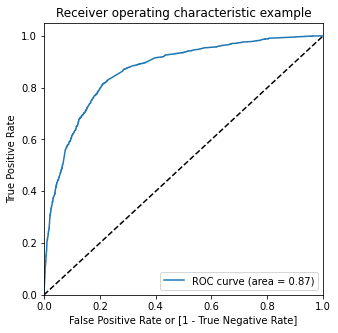

In [61]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### 8. Finding Optimal Cut-off to measure Accuracy metrics of the model

In [62]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.787115,5962,1,1,1,1,1,1,1,1,0,0
1,1,0.461028,5637,1,1,1,1,1,0,0,0,0,0
2,0,0.032681,6716,1,0,0,0,0,0,0,0,0,0
3,0,0.087734,1715,1,0,0,0,0,0,0,0,0,0
4,0,0.126991,1361,1,1,0,0,0,0,0,0,0,0


In [63]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

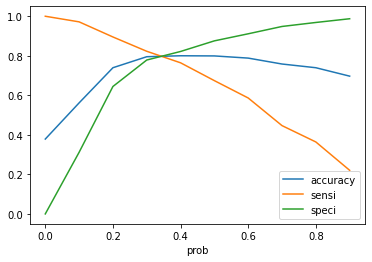

In [64]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From above curve we could see 0.3 is the optimal cutoff

In [65]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7952571349786295

In [66]:
#Getting confusion matrix for the predictions made on train dataset
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [67]:
# Let's see the sensitivity and specificity of our logistic regression model
print("Sensitivity -",TP / float(TP+FN))
print("Specificty -",TN / float(TN+FP))

Sensitivity - 0.8227156898434655
Specificty - 0.7785175321793165


In [68]:
# Calculate false postive rate , positive predcitive value and negative predictive value
print("False Positive Rate -",FP/ float(TN+FP))
print ("Positive Predicted Value -",TP / float(TP+FP))
print ("Negative Predicted Value -",TN / float(TN+ FN))

False Positive Rate - 0.22148246782068354
Positive Predicted Value - 0.6936771025168815
Negative Predicted Value - 0.8780976220275344


In [69]:
#let's look into precision and recall
from sklearn.metrics import precision_score, recall_score

print("Precision Score -",precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("Recall Score -",recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Precision Score - 0.6936771025168815
Recall Score - 0.8227156898434655


<Axes: >

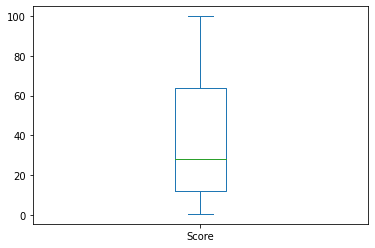

In [70]:
#getting the conversion score from probabilities
y_train_pred_final["Score"] = y_train_pred_final.Conversion_Prob.apply(lambda x: x*100)
y_train_pred_final["Score"].plot(kind="box")

#### We can see the score calculated ranges between 0 and 100

### 9. Making predictions and calculating score on Test data

In [71]:
#filtering out the test dataset to get necessary columns required to make prediction
X_test[scale_cols] = scaler.transform(X_test[scale_cols])
col=X_train.columns.to_list()
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3053,0,0.055076,0,0,0,0,0,0,0,1,0,0
686,0,0.923525,0,0,0,0,0,0,0,0,0,0
4091,0,1.683188,0,0,0,0,0,0,0,1,0,0
737,0,-0.879752,0,0,0,1,0,0,0,0,0,0
4390,0,-0.109026,0,0,0,0,1,0,0,1,0,0


In [72]:
#Making predictions on test data
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [73]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [74]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [75]:
y_pred_final.head()

,Converted,LeadID,0
0,0,3053,0.180820
1,1,686,0.487074
2,1,4091,0.581231
3,1,737,0.978731
4,0,4390,0.045102


In [76]:
#renaming and rearranging the columns
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,3053,0,0.180820
1,686,1,0.487074
2,4091,1,0.581231
3,737,1,0.978731
4,4390,0,0.045102


In [77]:
#applying the optimum cutoff i.e. 0.3 
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [78]:
# Let's check the various accuracy metrics score.
print("Accuracy -",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Sensitivity -",TP / float(TP+FN))
print("Specificty -",TN / float(TN+FP))
print("False Positive Rate -",FP/ float(TN+FP))
print ("Positive Predicted Value -",TP / float(TP+FP))
print ("Negative Predicted Value -",TN / float(TN+ FN))
print("Precision Score -",precision_score(y_pred_final.Converted, y_pred_final.final_predicted))
print("Recall Score -",recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy - 0.7717750826901875
Sensitivity - 0.8221574344023324
Specificty - 0.7411347517730497
False Positive Rate - 0.25886524822695034
Positive Predicted Value - 0.6588785046728972
Negative Predicted Value - 0.872651356993737
Precision Score - 0.6588785046728972
Recall Score - 0.8221574344023324


<Axes: >

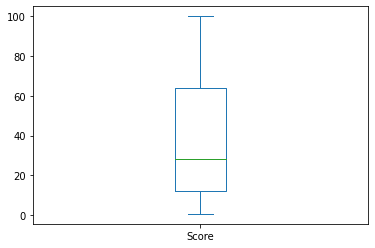

In [79]:
#getting the conversion score from probabilities
y_pred_final["Score"] = y_pred_final.Conversion_Prob.apply(lambda x: x*100)
y_pred_final["Score"].plot(kind="box")

#### We could see our model has an accuracy of 77% with 82% of sensitivity (which show's model's good ability to predict Conversion of lead which was asked by CEO to get it around 80%). Also the score assigned to the Leads fall under the range i.e. 0 to 100